In [1]:
pip install xlrd

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install jupyterthemes

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn
import csv
import os
import xlrd
from collections import defaultdict
import math as m
from jupyterthemes import jtplot

In [4]:
df = pd.read_csv('roadAccStats13-16.csv')

In [8]:
df1 = pd.read_csv('Details_of_road_accident_deaths_by_situation_state_2014.csv')

In [9]:
df2 = pd.read_csv('Persons_killed_due_to_Non-use_of_Safety_Device_2016.csv')

In [10]:
plt.rcParams['figure.figsize'] = [10, 5]

In [11]:
jtplot.style()
jtplot.style(theme='onedork')
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

In [12]:
df.head()

,SI. No.,States/UTs,State/UT-Wise Total Number of Road Accidents during - 2013,State/UT-Wise Total Number of Road Accidents during - 2014,State/UT-Wise Total Number of Road Accidents during - 2015,State/UT-Wise Total Number of Road Accidents during - 2016,Share of States/UTs in Total Number of Road Accidents - 2013,Share of States/UTs in Total Number of Road Accidents - 2014,Share of States/UTs in Total Number of Road Accidents - 2015,Share of States/UTs in Total Number of Road Accidents - 2016,Total Number of Accidents Per Lakh Population - 2013,Total Number of Accidents Per Lakh Population - 2014,Total Number of Accidents Per Lakh Population - 2015,Total Number of Accidents Per Lakh Population - 2016,"Total Number of Road Accidents per 10,000 Vehicles - 2013","Total Number of Road Accidents per 10,000 Vehicles - 2014","Total Number of Road Accidents per 10,000 Vehicles - 2015","Total Number of Road Accidents per 10,000 Km of Roads - 2013","Total Number of Road Accidents per 10,000 Km of Roads - 2014","Total Number of Road Accidents per 10,000 Km of Roads - 2015"
0,1,Andhra Pradesh,43482.0,24440,24258,24888,8.9,5.0,4.8,5.2,50.4,28.1,27.7,28.2,34.3,34.9,30.8,1661.8,1372.3,1355.0
1,2,Arunachal Pradesh,308.0,205,284,249,0.1,0.0,0.1,0.1,24.3,16.0,21.9,19.0,20.4,13.6,18.8,109.6,83.8,112.0
2,3,Assam,7211.0,7144,6959,7435,1.5,1.5,1.4,1.5,23.0,22.5,21.7,22.9,38.4,32.2,27.7,250.3,227.8,213.1
3,4,Bihar,10200.0,9556,9555,8222,2.1,2.0,1.9,1.7,10.2,9.4,9.3,7.9,28.2,23.0,20.0,517.1,455.6,463.8
4,5,Chhattisgarh,13657.0,13821,14446,13580,2.8,2.8,2.9,2.8,54.8,54.8,56.5,52.5,39.7,35.7,33.5,1530.4,1461.3,1481.1


In [13]:
df.shape

(37, 20)

In [14]:
df.dtypes

SI. No.                                                          object
States/UTs                                                       object
State/UT-Wise Total Number of Road Accidents during - 2013      float64
State/UT-Wise Total Number of Road Accidents during - 2014        int64
State/UT-Wise Total Number of Road Accidents during - 2015        int64
State/UT-Wise Total Number of Road Accidents during - 2016        int64
Share of States/UTs in Total Number of Road Accidents - 2013    float64
Share of States/UTs in Total Number of Road Accidents - 2014    float64
Share of States/UTs in Total Number of Road Accidents - 2015    float64
Share of States/UTs in Total Number of Road Accidents - 2016    float64
Total Number of Accidents Per Lakh Population - 2013            float64
Total Number of Accidents Per Lakh Population - 2014            float64
Total Number of Accidents Per Lakh Population - 2015            float64
Total Number of Accidents Per Lakh Population - 2016            

In [15]:
type(df['SI. No.'][0])

str

In [16]:
type(df['States/UTs'][0])

str

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 20 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   SI. No.                                                       37 non-null     object 
 1   States/UTs                                                    37 non-null     object 
 2   State/UT-Wise Total Number of Road Accidents during - 2013    36 non-null     float64
 3   State/UT-Wise Total Number of Road Accidents during - 2014    37 non-null     int64  
 4   State/UT-Wise Total Number of Road Accidents during - 2015    37 non-null     int64  
 5   State/UT-Wise Total Number of Road Accidents during - 2016    37 non-null     int64  
 6   Share of States/UTs in Total Number of Road Accidents - 2013  37 non-null     float64
 7   Share of States/UTs in Total Number of Road Accidents - 2014  37 non-null

In [19]:
row, column = df.shape

In [20]:
round(((row - df.isnull().sum())/ row) * 100,2)

SI. No.                                                         100.0
States/UTs                                                      100.0
State/UT-Wise Total Number of Road Accidents during - 2013       97.3
State/UT-Wise Total Number of Road Accidents during - 2014      100.0
State/UT-Wise Total Number of Road Accidents during - 2015      100.0
State/UT-Wise Total Number of Road Accidents during - 2016      100.0
Share of States/UTs in Total Number of Road Accidents - 2013    100.0
Share of States/UTs in Total Number of Road Accidents - 2014    100.0
Share of States/UTs in Total Number of Road Accidents - 2015    100.0
Share of States/UTs in Total Number of Road Accidents - 2016    100.0
Total Number of Accidents Per Lakh Population - 2013             97.3
Total Number of Accidents Per Lakh Population - 2014             97.3
Total Number of Accidents Per Lakh Population - 2015             97.3
Total Number of Accidents Per Lakh Population - 2016             97.3
Total Number of Road

In [21]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
dtype: bool

In [22]:
df['States/UTs'].value_counts()

States/UTs
Andhra Pradesh               1
Odisha                       1
Rajasthan                    1
Sikkim                       1
Tamil Nadu                   1
Telangana                    1
Tripura                      1
Uttarakhand                  1
Uttar Pradesh                1
West Bengal                  1
Andaman & Nicobar Islands    1
Chandigarh                   1
Dadra & Nagar Haveli         1
Daman & Diu                  1
Delhi                        1
Lakshadweep                  1
Puducherry                   1
Punjab                       1
Nagaland                     1
Arunachal Pradesh            1
Mizoram                      1
Assam                        1
Bihar                        1
Chhattisgarh                 1
Goa                          1
Gujarat                      1
Haryana                      1
Himachal Pradesh             1
Jammu & Kashmir              1
Jharkhand                    1
Karnataka                    1
Kerala                      

In [23]:
df1.head()

,States/UTs,Year,CrimeHead,Offenders (Driver/Pedestrian) Died_Male,Offenders (Driver/Pedestrian) Died_Female,Offenders (Driver/Pedestrian) Died_Transgender,Offenders (Driver/Pedestrian) Died_Total,Victims Died_Male,Victims Died_Female,Victims Died_Transgender,Victims Died_Total
0,Andhra Pradesh,2014,Truck/Lorry (Total),445,30,0,475,871,135,0,1006
1,Andhra Pradesh,2014,Truck/Lorry - Normal Goods Carriers,357,25,0,382,577,101,0,678
2,Andhra Pradesh,2014,Truck/Lorry - Trailer/Container Carriers,12,0,0,12,25,0,0,25
3,Andhra Pradesh,2014,Truck/Lorry - Tankers,10,0,0,10,102,15,0,117
4,Andhra Pradesh,2014,Truck/Lorry - Others,66,5,0,71,167,19,0,186


In [24]:
df1['CrimeHead'].unique()
df1['CrimeHead'].nunique()

37

In [25]:
df1.shape

(1443, 11)

In [26]:
df1.dtypes

States/UTs                                        object
Year                                               int64
CrimeHead                                         object
Offenders (Driver/Pedestrian) Died_Male            int64
Offenders (Driver/Pedestrian) Died_Female          int64
Offenders (Driver/Pedestrian) Died_Transgender     int64
Offenders (Driver/Pedestrian) Died_Total           int64
Victims Died_Male                                  int64
Victims Died_Female                                int64
Victims Died_Transgender                           int64
Victims Died_Total                                 int64
dtype: object

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 11 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   States/UTs                                      1443 non-null   object
 1   Year                                            1443 non-null   int64 
 2   CrimeHead                                       1443 non-null   object
 3   Offenders (Driver/Pedestrian) Died_Male         1443 non-null   int64 
 4   Offenders (Driver/Pedestrian) Died_Female       1443 non-null   int64 
 5   Offenders (Driver/Pedestrian) Died_Transgender  1443 non-null   int64 
 6   Offenders (Driver/Pedestrian) Died_Total        1443 non-null   int64 
 7   Victims Died_Male                               1443 non-null   int64 
 8   Victims Died_Female                             1443 non-null   int64 
 9   Victims Died_Transgender                        1443

In [28]:
df1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1438    False
1439    False
1440    False
1441    False
1442    False
Length: 1443, dtype: bool

In [29]:
round(((row - df.isnull().sum())/row) * 100, 2)

SI. No.                                                         100.0
States/UTs                                                      100.0
State/UT-Wise Total Number of Road Accidents during - 2013       97.3
State/UT-Wise Total Number of Road Accidents during - 2014      100.0
State/UT-Wise Total Number of Road Accidents during - 2015      100.0
State/UT-Wise Total Number of Road Accidents during - 2016      100.0
Share of States/UTs in Total Number of Road Accidents - 2013    100.0
Share of States/UTs in Total Number of Road Accidents - 2014    100.0
Share of States/UTs in Total Number of Road Accidents - 2015    100.0
Share of States/UTs in Total Number of Road Accidents - 2016    100.0
Total Number of Accidents Per Lakh Population - 2013             97.3
Total Number of Accidents Per Lakh Population - 2014             97.3
Total Number of Accidents Per Lakh Population - 2015             97.3
Total Number of Accidents Per Lakh Population - 2016             97.3
Total Number of Road

In [30]:
Mean2013 = np.mean(df['State/UT-Wise Total Number of Road Accidents during - 2013'])
print("Mean of accidents in all states in year 2013: {}".format(Mean2013))

Mean of accidents in all states in year 2013: 27026.444444444445


In [31]:
Mean2014 = np.mean(df['State/UT-Wise Total Number of Road Accidents during - 2014'])
print("Mean of accidents in all states in year 2014 : {}".format(Mean2014))

Mean of accidents in all states in year 2014 : 26454.054054054053


In [32]:
Mean2015 = np.mean(df['State/UT-Wise Total Number of Road Accidents during - 2015'])
print("Mean of accidents in all states in year 2015 : {}".format(Mean2015))

Mean of accidents in all states in year 2015 : 27103.945945945947


In [33]:
Mean2016 = np.mean(df['State/UT-Wise Total Number of Road Accidents during - 2016'])
print("Mean of accidents in all states in 2016 {}".format(Mean2016))

Mean of accidents in all states in 2016 25981.18918918919


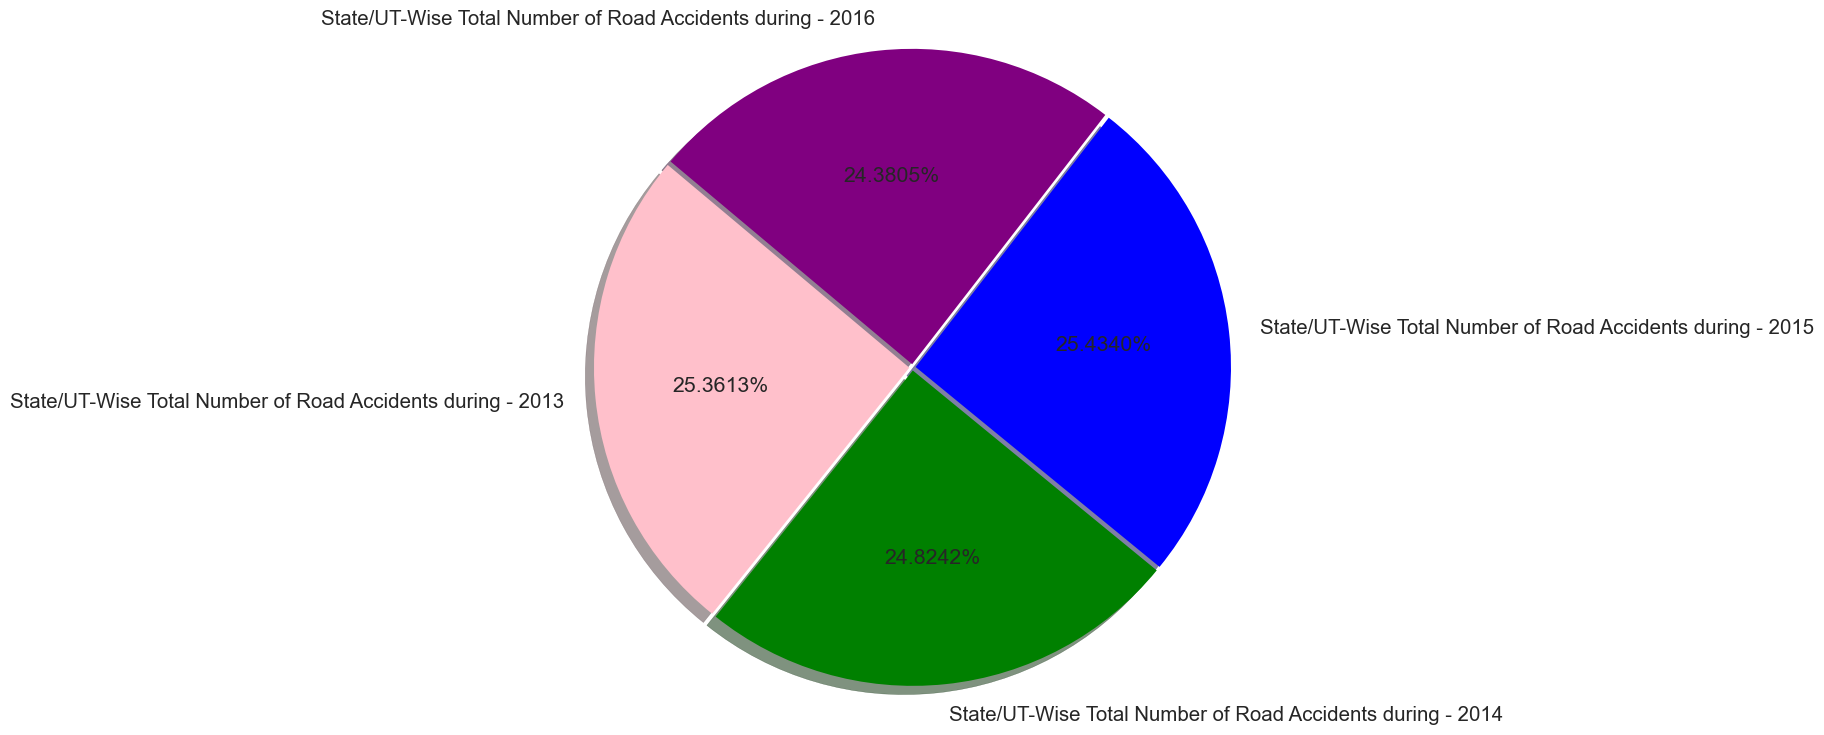

In [34]:

labels = 'State/UT-Wise Total Number of Road Accidents during - 2013', 'State/UT-Wise Total Number of Road Accidents during - 2014', 'State/UT-Wise Total Number of Road Accidents during - 2015', 'State/UT-Wise Total Number of Road Accidents during - 2016'
sizes = [Mean2013, Mean2014, Mean2015, Mean2016]
colors = ['pink', 'green', 'blue', 'purple']
explode = (0.01, 0.01, 0.01, 0.01)
plt.pie(sizes, labels = labels, colors = colors, explode = explode,
       shadow = True, autopct = '%.4f%%', startangle = 140)
plt.axis('equal')
plt.show()

In [35]:
accident2013 = np.mean(df['Total Number of Accidents Per Lakh Population - 2013'])
print("Mean of accidents per lakh population year 2013 : {}".format(accident2013))

Mean of accidents per lakh population year 2013 : 41.91111111111111


In [36]:
accident2014 = np.mean(df['Total Number of Accidents Per Lakh Population - 2014'])
print("Mean of accidents per lakh population year 2014 : {}".format(accident2014))

Mean of accidents per lakh population year 2014 : 39.87777777777777


In [37]:
accident2015 = np.mean(df['Total Number of Accidents Per Lakh Population - 2015'])
print("Mean of accidents per lakh population year 2015 : {}".format(accident2015))

Mean of accidents per lakh population year 2015 : 40.83333333333332


In [38]:
accident2016 = np.mean(df['Total Number of Accidents Per Lakh Population - 2016'])
print("Mean of accidents per lakh population year 2016 : {}".format(accident2016))

Mean of accidents per lakh population year 2016 : 39.63611111111111


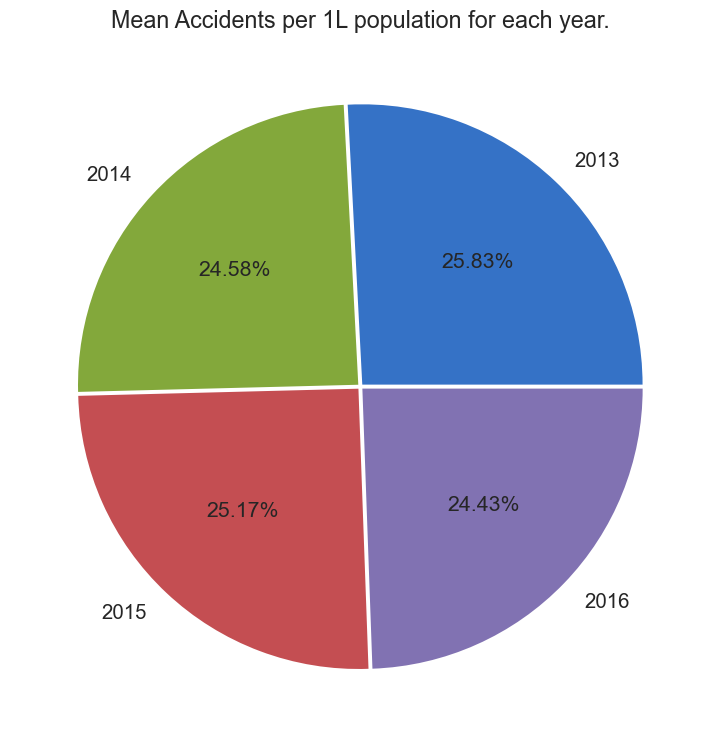

In [39]:
labels = ('2013','2014','2015','2016')
explode = (0.01,0.01,0.01,0.01)
performance = [accident2013, accident2014, accident2015, accident2016]
plt.pie(performance, labels = labels, autopct = '%.2f%%', center = (0,0), explode = explode )
plt.title("Mean Accidents per 1L population for each year.")
plt.show()

In [41]:
df1.head()

,States/UTs,Year,CrimeHead,Offenders (Driver/Pedestrian) Died_Male,Offenders (Driver/Pedestrian) Died_Female,Offenders (Driver/Pedestrian) Died_Transgender,Offenders (Driver/Pedestrian) Died_Total,Victims Died_Male,Victims Died_Female,Victims Died_Transgender,Victims Died_Total
0,Andhra Pradesh,2014,Truck/Lorry (Total),445,30,0,475,871,135,0,1006
1,Andhra Pradesh,2014,Truck/Lorry - Normal Goods Carriers,357,25,0,382,577,101,0,678
2,Andhra Pradesh,2014,Truck/Lorry - Trailer/Container Carriers,12,0,0,12,25,0,0,25
3,Andhra Pradesh,2014,Truck/Lorry - Tankers,10,0,0,10,102,15,0,117
4,Andhra Pradesh,2014,Truck/Lorry - Others,66,5,0,71,167,19,0,186


In [42]:
df1.dtypes

States/UTs                                        object
Year                                               int64
CrimeHead                                         object
Offenders (Driver/Pedestrian) Died_Male            int64
Offenders (Driver/Pedestrian) Died_Female          int64
Offenders (Driver/Pedestrian) Died_Transgender     int64
Offenders (Driver/Pedestrian) Died_Total           int64
Victims Died_Male                                  int64
Victims Died_Female                                int64
Victims Died_Transgender                           int64
Victims Died_Total                                 int64
dtype: object

In [44]:
MeanOffMale = (np.mean(df1['Offenders (Driver/Pedestrian) Died_Male']))

In [45]:
MeanOffFemale = (np.mean(df1['Offenders (Driver/Pedestrian) Died_Female']))

In [46]:
MeanOffTrans = (np.mean(df1['Offenders (Driver/Pedestrian) Died_Transgender']))
MeanOffTrans, MeanOffMale, MeanOffFemale

(0.0, 251.59251559251558, 21.717255717255718)

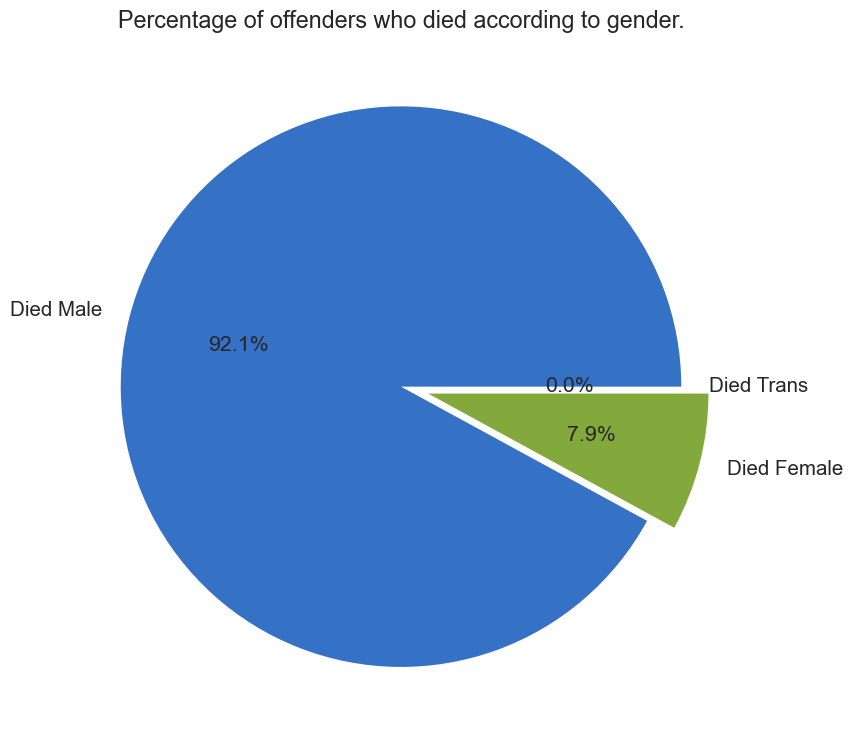

In [47]:
sizes = [MeanOffMale, MeanOffFemale, MeanOffTrans]
labels = ['Died Male','Died Female', 'Died Trans']
explode = (0, 0.1, 0)
plt.pie(sizes, labels = labels, explode = explode, autopct = '%.1f%%')
plt.title("Percentage of offenders who died according to gender.")
plt.show()

In [48]:
MeanVictMale = (np.mean(df1['Victims Died_Male']))

In [49]:
MeanVictFemale = (np.mean(df1['Victims Died_Female']))

In [50]:
MeanVictTrans = (np.mean(df1['Victims Died_Transgender']))
MeanVictMale, MeanVictFemale, MeanVictTrans

(705.8731808731809, 138.59667359667358, 0.13513513513513514)

In [51]:
sizes = [MeanVictMale, MeanVictFemale, MeanVictTrans]
labels = 'Victims Died_Male', 'Victims Died_Female', 'Victims Died_Transgender'
explode =(0, 0.1, 0)

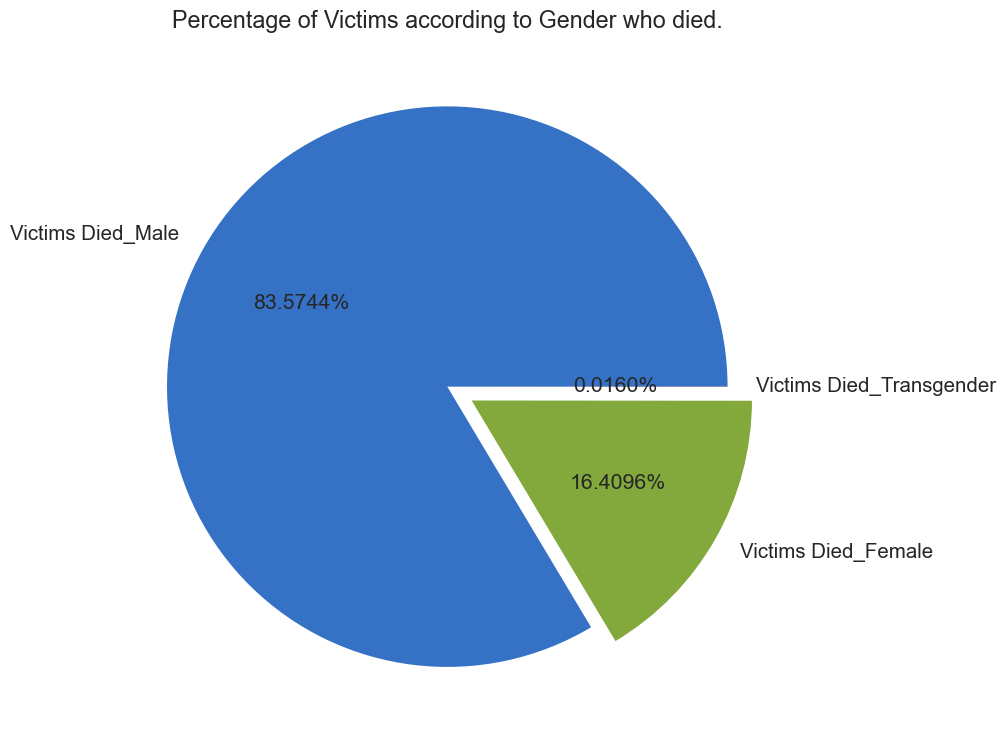

In [52]:
plt.pie(sizes, labels = labels, explode = explode, autopct = '%.4f%%')
plt.title("Percentage of Victims according to Gender who died.")
plt.show()

In [53]:
df2.head()

,S. No.,State/ UT,Non-wearing of Helmet - Male,Non-wearing of Helmet - Female,Non-wearing of Helmet - Total,Non-wearing of seat belt - Male,Non-wearing of seat belt - Female,Non-wearing of seat belt - Total
0,1,Andhra Pradesh,459,18,477,222,15,237
1,2,Arunachal Pradesh,10,4,14,0,0,0
2,3,Assam,0,0,0,0,0,0
3,4,Bihar,0,0,0,0,0,0
4,5,Chhattisgarh,89,7,96,6,0,6


In [54]:

helmetMale = (np.mean(df2['Non-wearing of Helmet - Male']))
helmetFemale = (np.mean(df2['Non-wearing of Helmet - Female']))
helmetFemale, helmetMale

(82.10810810810811, 465.72972972972974)

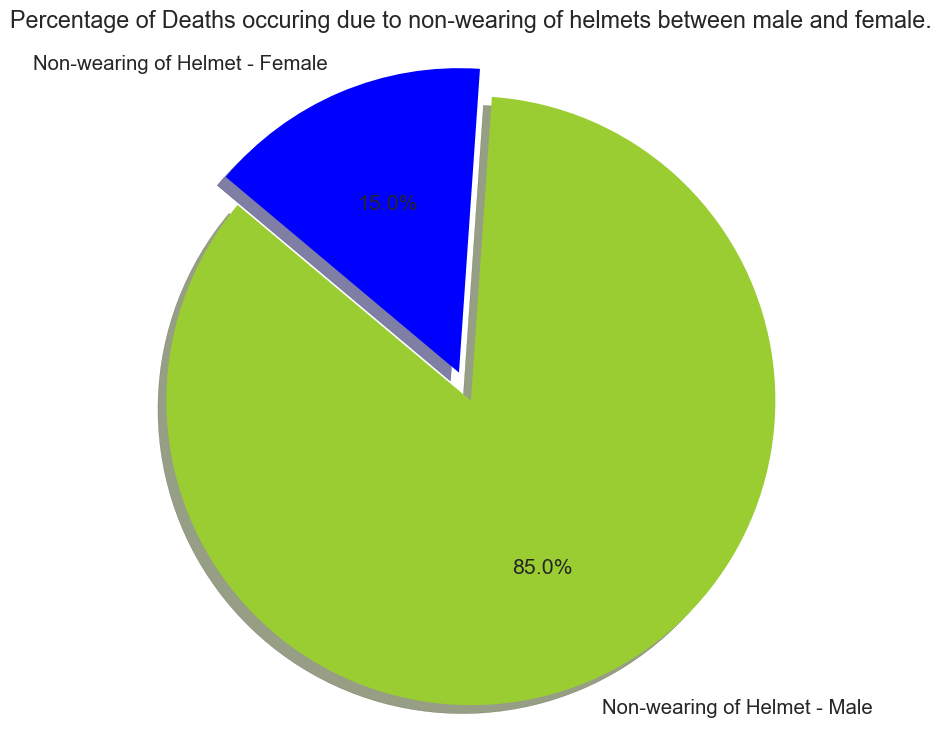

In [55]:
labels = 'Non-wearing of Helmet - Male','Non-wearing of Helmet - Female'
sizes = [helmetMale, helmetFemale]
colors = ['yellowgreen', 'blue']
explode = (0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Percentage of Deaths occuring due to non-wearing of helmets between male and female.")

plt.axis('equal')
plt.show()

In [56]:
max1 = df2['Non-wearing of Helmet - Total'].max()
max2 = df2['Non-wearing of seat belt - Total'].max()
max1, max2

(10135, 5638)

In [58]:
df3 = pd.read_excel('accidents03-16.xls')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [59]:
df3.head()

,States/Uts,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Andhra Pradesh,8616.0,9343.0,9126.0,11378.0,11885.0,12233.0,12676.0,13932.0,13783.0,13560.0,13175.0,7277,7524,7851
1,Arunachal Pradesh,65.0,79.0,63.0,87.0,81.0,90.0,114.0,108.0,96.0,94.0,120.0,92,117,103
2,Assam,1120.0,1177.0,1420.0,1627.0,1483.0,1641.0,1735.0,1924.0,2015.0,2011.0,2162.0,2169,2122,2445
3,Bihar,2138.0,1579.0,1462.0,2315.0,3074.0,3514.0,4038.0,4513.0,4676.0,4706.0,4612.0,4505,4771,4425
4,Chhattisgarh,1788.0,1892.0,2049.0,2288.0,2496.0,2600.0,2566.0,2668.0,2659.0,2783.0,3059.0,3570,3710,3527


In [60]:
df3.tail()

,States/Uts,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
32,Daman & Diu,19.0,23.0,21.0,24.0,29.0,29.0,32.0,30.0,33.0,26.0,30.0,15,38,32
33,Delhi,1730.0,1846.0,1771.0,2129.0,2081.0,2015.0,2272.0,2104.0,2007.0,1822.0,1778.0,1629,1582,1548
34,Lakshadweep,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,0,0,1
35,Puducherry,182.0,176.0,224.0,209.0,242.0,207.0,214.0,224.0,230.0,178.0,223.0,145,229,235
36,All India,73589.0,79357.0,83491.0,93917.0,101161.0,106591.0,110993.0,119558.0,121618.0,123093.0,122589.0,125828,131726,136071


In [61]:
df3['States/Uts']

0                Andhra Pradesh
1             Arunachal Pradesh
2                         Assam
3                         Bihar
4                  Chhattisgarh
5                           Goa
6                       Gujarat
7                       Haryana
8              Himachal Pradesh
9               Jammu & Kashmir
10                    Jharkhand
11                    Karnataka
12                       Kerala
13               Madhya Pradesh
14                  Maharashtra
15                      Manipur
16                    Meghalaya
17                      Mizoram
18                     Nagaland
19                       Odisha
20                       Punjab
21                    Rajasthan
22                       Sikkim
23                   Tamil Nadu
24                    Telangana
25                      Tripura
26                  Uttarakhand
27                Uttar Pradesh
28                  West Bengal
29    Andaman & Nicobar Islands
30                   Chandigarh
31      

In [62]:
df8 = pd.DataFrame(columns = ['Year','Count'])

In [63]:
df8['Year'] = df3[df3['States/Uts'] == 'All India'].columns[1:]

In [64]:
df8 = df3[df3['States/Uts'] == "All India"]
df9 = df8.T

In [65]:
df9.to_csv('accidentRate.csv')

In [66]:

plt.figure(figsize = (20,10))
plt.rcParams.update({'font.size' : 18})

<Figure size 2000x1000 with 0 Axes>

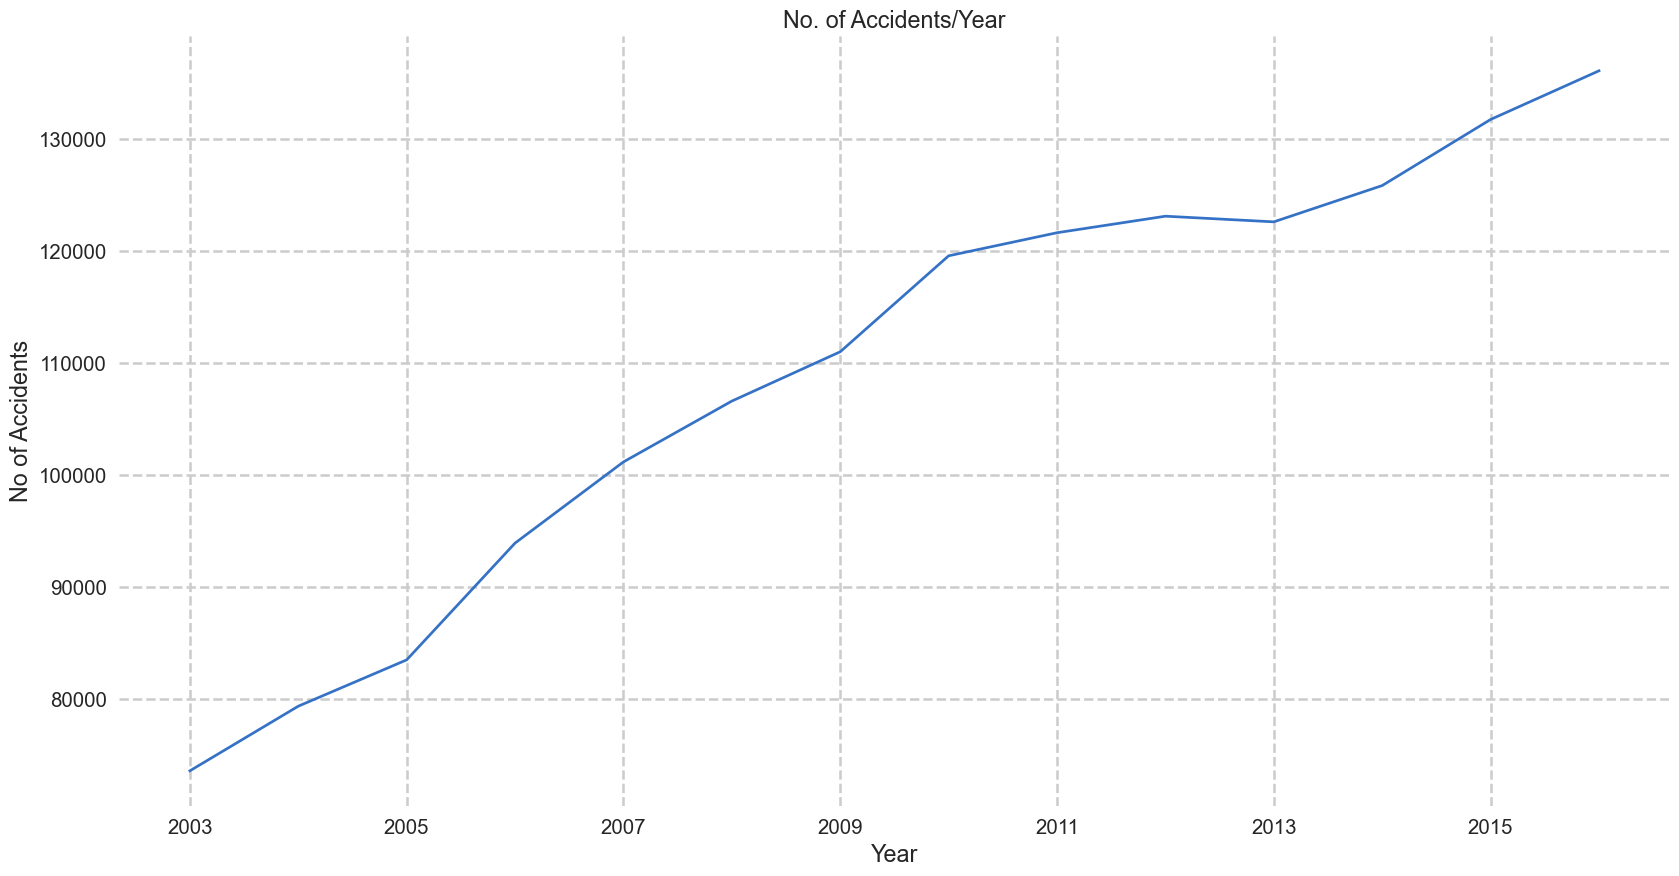

In [67]:
df9.iloc[1:].plot(figsize = (20,10), legend =  False)
plt.xlabel("Year")
plt.ylabel("No of Accidents")
plt.title("No. of Accidents/Year")
plt.show()

In [68]:

df4 = pd.read_csv('laneAccidents.csv')

In [69]:
df4.head()

,S.No,State/UT,Single Lane - Accident - 2014,Single Lane - Accident - 2014 per 1L people,Single Lane - Killed - 2014,Single Lane - Killed - 2014 per 1L people,Single Lane - Injured - 2014,Single Lane - Injured - 2014 per 1L people,Two Lanes - Accident - 2014,Two Lanes - Accident - 2014 per 1L people,...,3 Lanes or more w.o Median - Killed - 2014 per 1L people,3 Lanes or more w.o Median - Injured - 2014,3 Lanes or more w.o Median - Injured - 2014 per 1L people,4 Lanes with Median - Accident - 2014,4 Lanes with Median - Accident - 2014 per 1L people,4 Lanes with Median - Killed - 2014,4 Lanes with Median - Killed - 2014 per 1L people,4 Lanes with Median - Injured - 2014,4 Lanes with Median - Injured - 2014 per 1L people,Population
0,1,Andhra Pradesh,8634.0,16.473750,2958.0,5.643891,13541.0,25.836350,10327.0,19.704009,...,0.755572,1199.0,2.287703,4291.0,8.187267,1560.0,2.976494,5069.0,9.671698,52410653
1,2,Arunachal Pradesh,90.0,6.504173,60.0,4.336115,152.0,10.984826,115.0,8.310888,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,1383727
2,3,Assam,3888.0,12.459312,1217.0,3.899944,3195.0,10.238555,2432.0,7.793479,...,0.080114,42.0,0.134591,768.0,2.461099,245.0,0.785116,752.0,2.409826,31205576
3,4,Bihar,3731.0,3.584073,1815.0,1.743525,2475.0,2.377534,4156.0,3.992336,...,0.374642,485.0,0.465901,913.0,0.877046,612.0,0.587899,588.0,0.564844,104099452
4,5,Chhattisgarh,7961.0,31.164370,2244.0,8.784430,7762.0,30.385359,4696.0,18.383103,...,0.000000,0.0,0.000000,1164.0,4.556629,254.0,0.994316,734.0,2.873338,25545198


In [70]:
df4.dtypes

S.No                                                           object
State/UT                                                       object
Single Lane - Accident - 2014                                 float64
Single Lane - Accident - 2014 per 1L people                   float64
Single Lane - Killed - 2014                                   float64
Single Lane - Killed - 2014 per 1L people                     float64
Single Lane - Injured - 2014                                  float64
Single Lane - Injured - 2014 per 1L people                    float64
Two Lanes - Accident - 2014                                   float64
Two Lanes - Accident - 2014 per 1L people                     float64
Two Lanes - Killed - 2014                                     float64
Two Lanes - Killed - 2014 per 1L people                       float64
Two Lanes - Injured - 2014                                    float64
Two Lanes - Injured - 2014 per 1L people                      float64
3 Lanes or more w.o 

In [71]:
df4.dropna(axis = 0, how ='any', inplace = True)

In [72]:
singleLaneAcc = df4['Single Lane - Accident - 2014 per 1L people']
twoLaneAcc = df4['Two Lanes - Accident - 2014 per 1L people']
threeLaneAcc = df4['3 Lanes or more w.o Median - Accident - 2014 per 1L people']
fourLaneAcc = df4['4 Lanes with Median - Accident - 2014 per 1L people']df5 = pd.read_csv

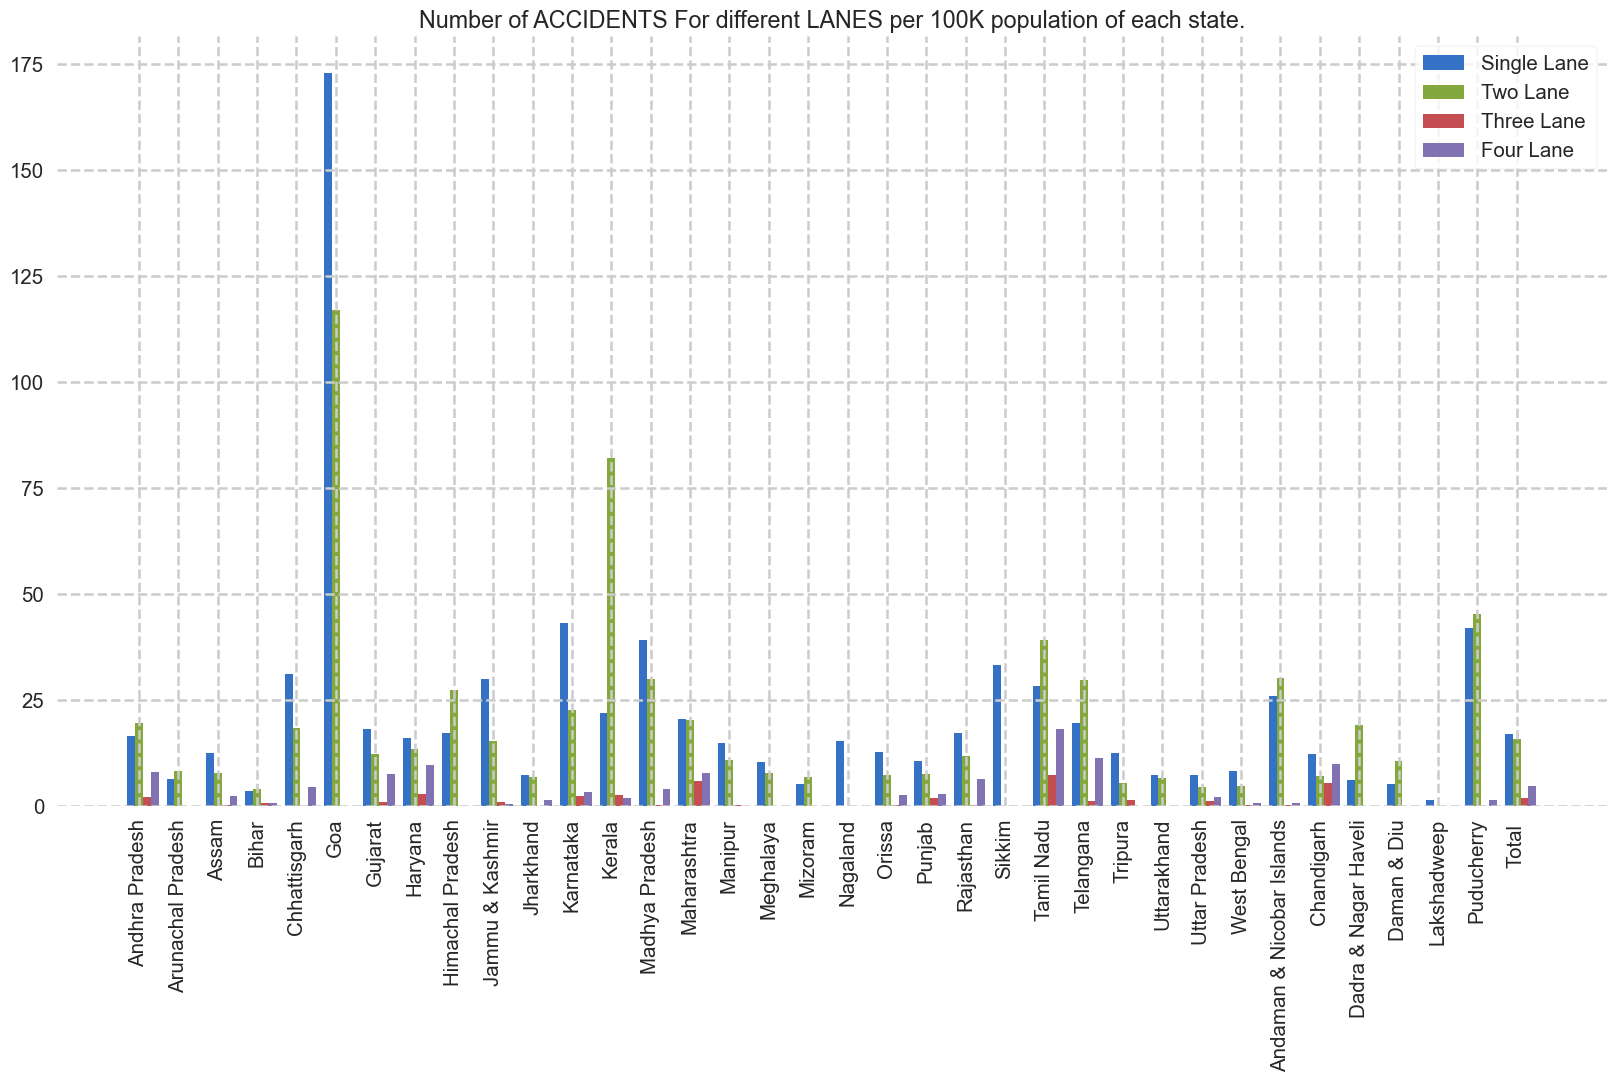

In [73]:
plt.figure(figsize = (20,10))
plt.rcParams.update({'font.size':18})
UT = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])

plt.bar(UT-0.2, singleLaneAcc, label='Single Lane', width = 0.2,
        align = 'center')
plt.bar(UT, twoLaneAcc, label = 'Two Lane', width = 0.2,
        align = 'center')
plt.bar(UT+0.2, threeLaneAcc, label = 'Three Lane', width = 0.2,
        align = 'center')
plt.bar(UT+0.4, fourLaneAcc, label = 'Four Lane', width =0.2,
        align = 'center')

plt.xticks(UT, df4['State/UT'], rotation = 'vertical' )
plt.legend(loc = 'best')
plt.title("Number of ACCIDENTS For different LANES per 100K population of each state.")
plt.show()

In [74]:
df5 = pd.read_csv('reasonOfAccident.csv')

In [75]:
df5.head()

,Sl. No,States/UTs,Fault of Driver-Total No. of Road Accidents - 2014,Fault of Driver-Total No. of Road Accidents - 2014 per 1L people,Fault of Driver-Number of Persons-Killed - 2014,Fault of Driver-Number of Persons-Killed - 2014 per 1L people,Fault of Driver-Number of Persons-Injured - 2014,Fault of Driver-Number of Persons-Injured - 2014 per 1L people,Fault of Driver of other vehicles-Total No. of Road Accidents - 2014,Fault of Driver of other vehicles-Total No. of Road Accidents - 2014 per 1L people,...,Falling of boulders-Number of Persons-Killed - 2014 per 1L people,Falling of boulders-Number of Persons-Injured - 2014,Falling of boulders-Number of Persons-Injured - 2014 per 1L people,Other causes/causes not known-Total No. of Road Accidents - 2014,Other causes/causes not known-Total No. of Road Accidents - 2014 per 1L people,Other causes/causes not known-Number of Persons-Killed - 2014,Other causes/causes not known-Number of Persons-Killed - 2014 per 1L people,Other causes/causes not known-Number of Persons-Injured - 2014,Other causes/causes not known-Number of Persons-Injured - 2014 per 1L people,Population
0,1,Andhra Pradesh,21359.0,40.753165,6743,12.865705,26287.0,50.155834,288.0,0.549507,...,0.001908,12.0,0.022896,1530.0,2.919254,545,1.039865,1617.0,3.085251,52410653
1,2,Arunachal Pradesh,30.0,2.168058,19,1.373103,30.0,2.168058,20.0,1.445372,...,0.000000,0.0,0.000000,34.0,2.457132,22,1.589909,54.0,3.902504,1383727
2,3,Assam,6895.0,22.095410,2429,7.783865,6281.0,20.127813,2.0,0.006409,...,0.000000,0.0,0.000000,43.0,0.137796,10,0.032046,35.0,0.112159,31205576
3,4,Bihar,5008.0,4.810784,2646,2.541800,3374.0,3.241131,608.0,0.584057,...,0.042267,58.0,0.055716,960.0,0.922195,528,0.507207,745.0,0.715662,104099452
4,5,Chhattisgarh,9108.0,35.654451,2458,9.622161,8710.0,34.096428,726.0,2.842021,...,0.027402,38.0,0.148756,1552.0,6.075506,555,2.172620,1421.0,5.562689,25545198


In [76]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 63 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Sl. No                                                                                 37 non-null     object 
 1   States/UTs                                                                             37 non-null     object 
 2   Fault of Driver-Total No. of Road Accidents - 2014                                     36 non-null     float64
 3   Fault of Driver-Total No. of Road Accidents - 2014 per 1L people                       36 non-null     float64
 4   Fault of Driver-Number of Persons-Killed - 2014                                        37 non-null     int64  
 5   Fault of Driver-Number of Persons-Killed - 2014 per 1L people                   

In [78]:
driverFault = df5['Fault of Driver-Number of Persons-Killed - 2014 per 1L people']
otherDriversFault = df5['Fault of Driver of other vehicles-Number of Persons-Killed - 2014 per 1L people']
pedestrianFault = df5['Fault of Pedestrian-Number of Persons-Killed - 2014 per 1L people']
conditionOfVehicleFault = df5['Defect in Condition of Motor Vehicle-Number of Persons-Killed - 2014 per 1L people']
roadConditionFault = df5['Defect in Road Condition-Number of Persons-Killed - 2014 per 1L people']
weatherConditionFault = df5['Weather Condition-Number of Persons-Killed - 2014 per 1L people']
passengerFault = df5['Fault of Passenger-Number of Persons-Killed - 2014 per 1L people']
poorLightFault = df5['Poor light-Number of Persons-Killed - 2014 per 1L people']
bouldersFault = df5['Falling of boulders-Number of Persons-Killed - 2014 per 1L people']
otherCauses = df5['Other causes/causes not known-Number of Persons-Killed - 2014 per 1L people']

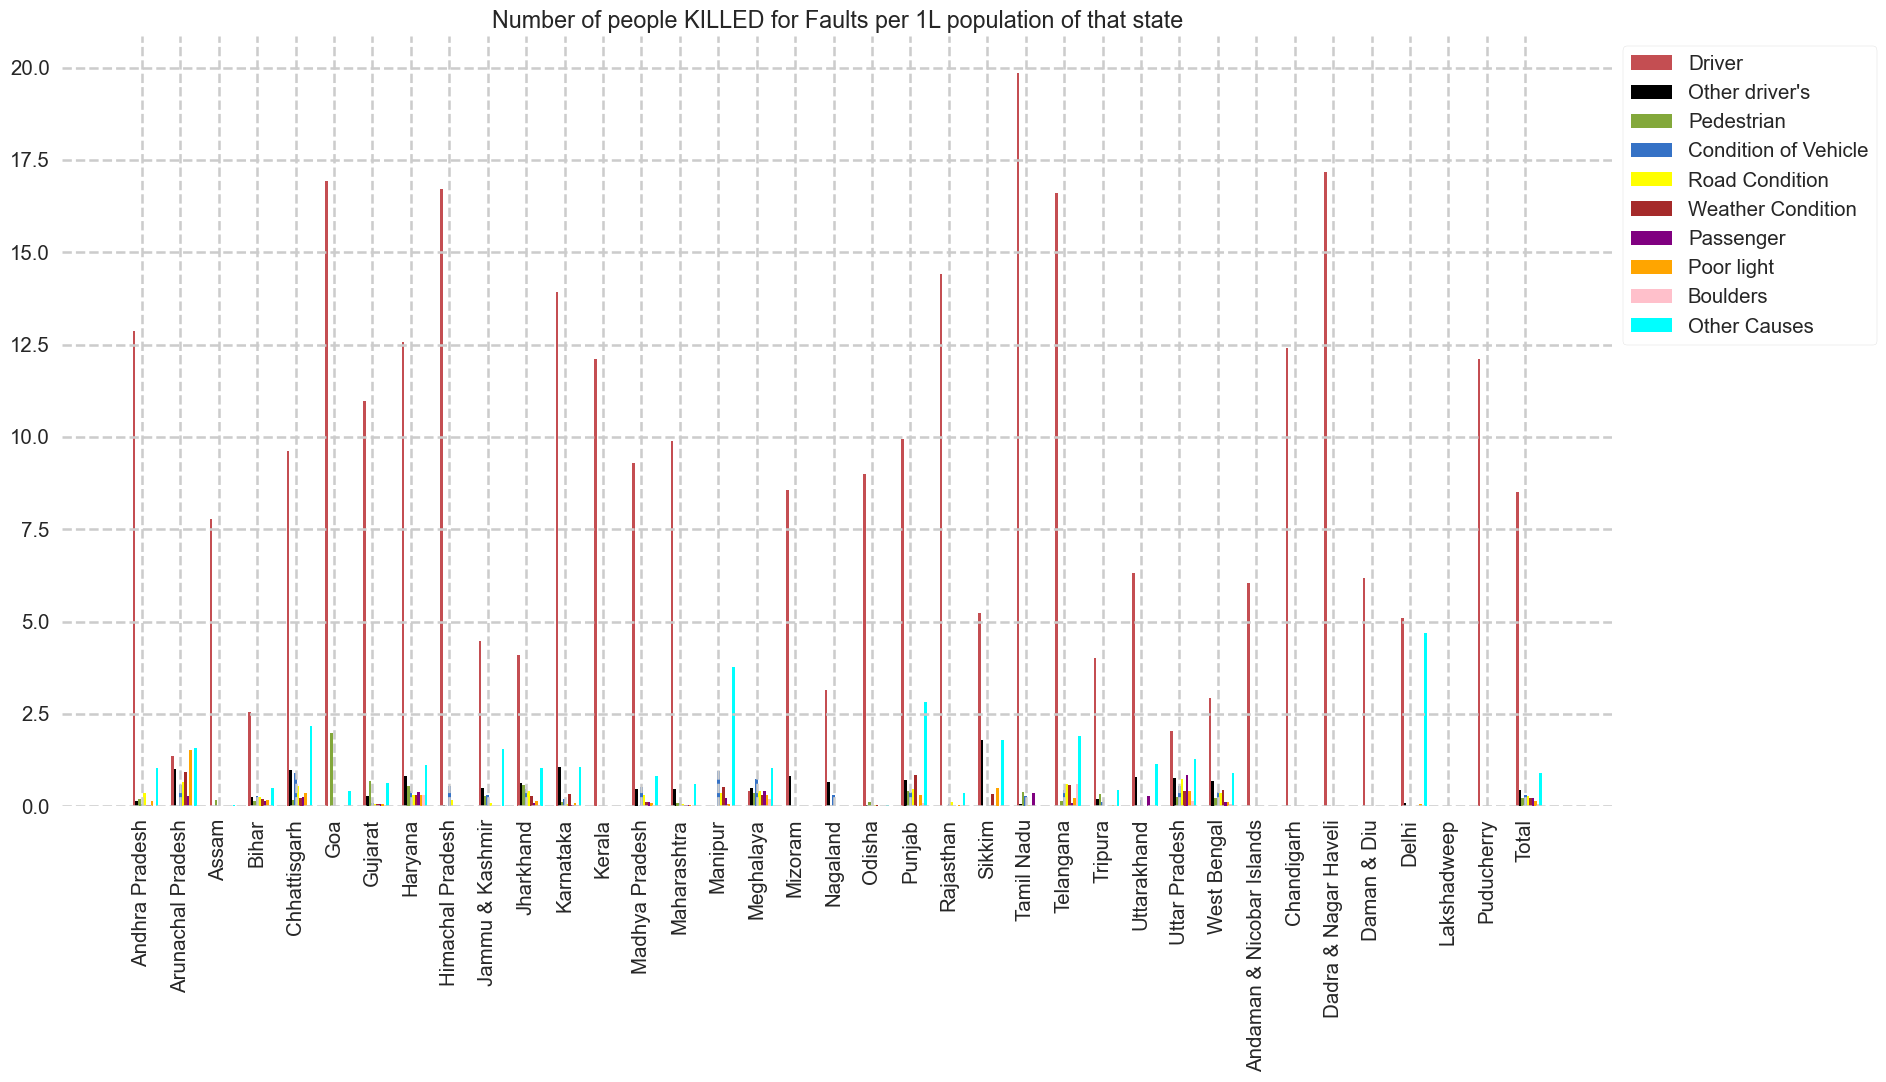

In [93]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

UT=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37])
UT=UT*3

plt.bar(UT-0.6, driverFault, width = 0.2, color = 'r', align = 'center', label = 'Driver')
plt.bar(UT-0.4, otherDriversFault,width=0.2, color='black', align='center', label='Other driver\'s')
plt.bar(UT-0.2, pedestrianFault,width=0.2, color='g', align='center', label='Pedestrian')
plt.bar(UT, conditionOfVehicleFault,width=0.2, color='b', align='center', label='Condition of Vehicle')
plt.bar(UT+0.2, roadConditionFault,width=0.2, color='yellow', align='center', label='Road Condition')
plt.bar(UT+0.4, weatherConditionFault,width=0.2, color='brown', align='center', label='Weather Condition')
plt.bar(UT+0.6, passengerFault,width=0.2, color='purple', align='center', label='Passenger')
plt.bar(UT+0.8, poorLightFault,width=0.2, color='orange', align='center', label='Poor light')
plt.bar(UT+1.0, bouldersFault,width=0.2, color='pink', align='center', label='Boulders')
plt.bar(UT+1.2, otherCauses,width=0.2, color='cyan', align='center', label='Other Causes')

plt.xticks(UT,df['States/UTs'],rotation='vertical')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title("Number of people KILLED for Faults per 1L population of that state")
plt.show()


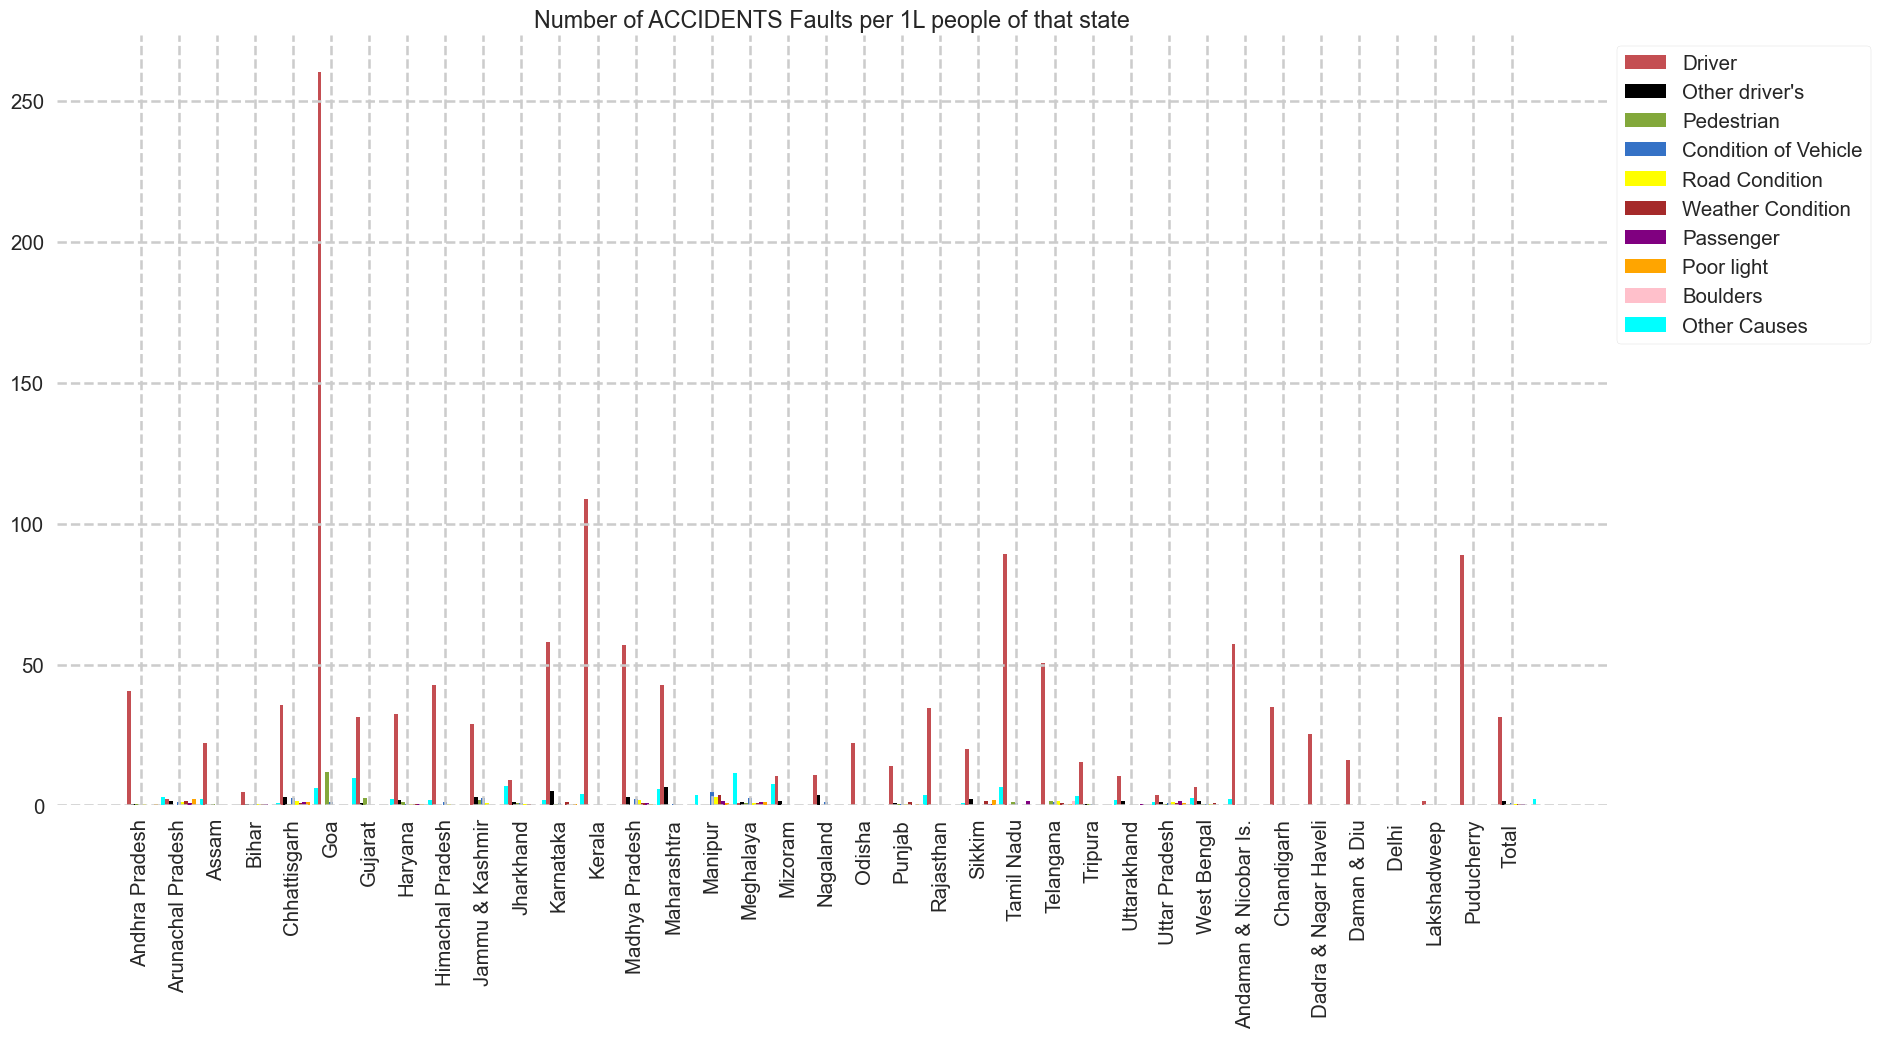

In [91]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.6,df5['Fault of Driver-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='r',align='center',label='Driver')
plt.bar(UT-0.4,df5['Fault of Driver of other vehicles-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='black',align='center',label='Other driver\'s')
plt.bar(UT-0.2,df5['Fault of Pedestrian-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Pedestrian')
plt.bar(UT,df5['Defect in Condition of Motor Vehicle-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='b',align='center',label='Condition of Vehicle')
plt.bar(UT+0.2,df5['Defect in Road Condition-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Road Condition')
plt.bar(UT+0.4,df5['Weather Condition-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='brown',align='center',label='Weather Condition')
plt.bar(UT+0.6,df5['Fault of Passenger-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='purple',align='center',label='Passenger')
plt.bar(UT+0.8,df5['Poor light-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='orange',align='center',label='Poor light')
plt.bar(UT+1.0,df5['Falling of boulders-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='pink',align='center',label='Boulders')
plt.bar(UT+1.2,df5['Other causes/causes not known-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='cyan',align='center',label='Other Causes')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title("Number of ACCIDENTS Faults per 1L people of that state")
plt.show()

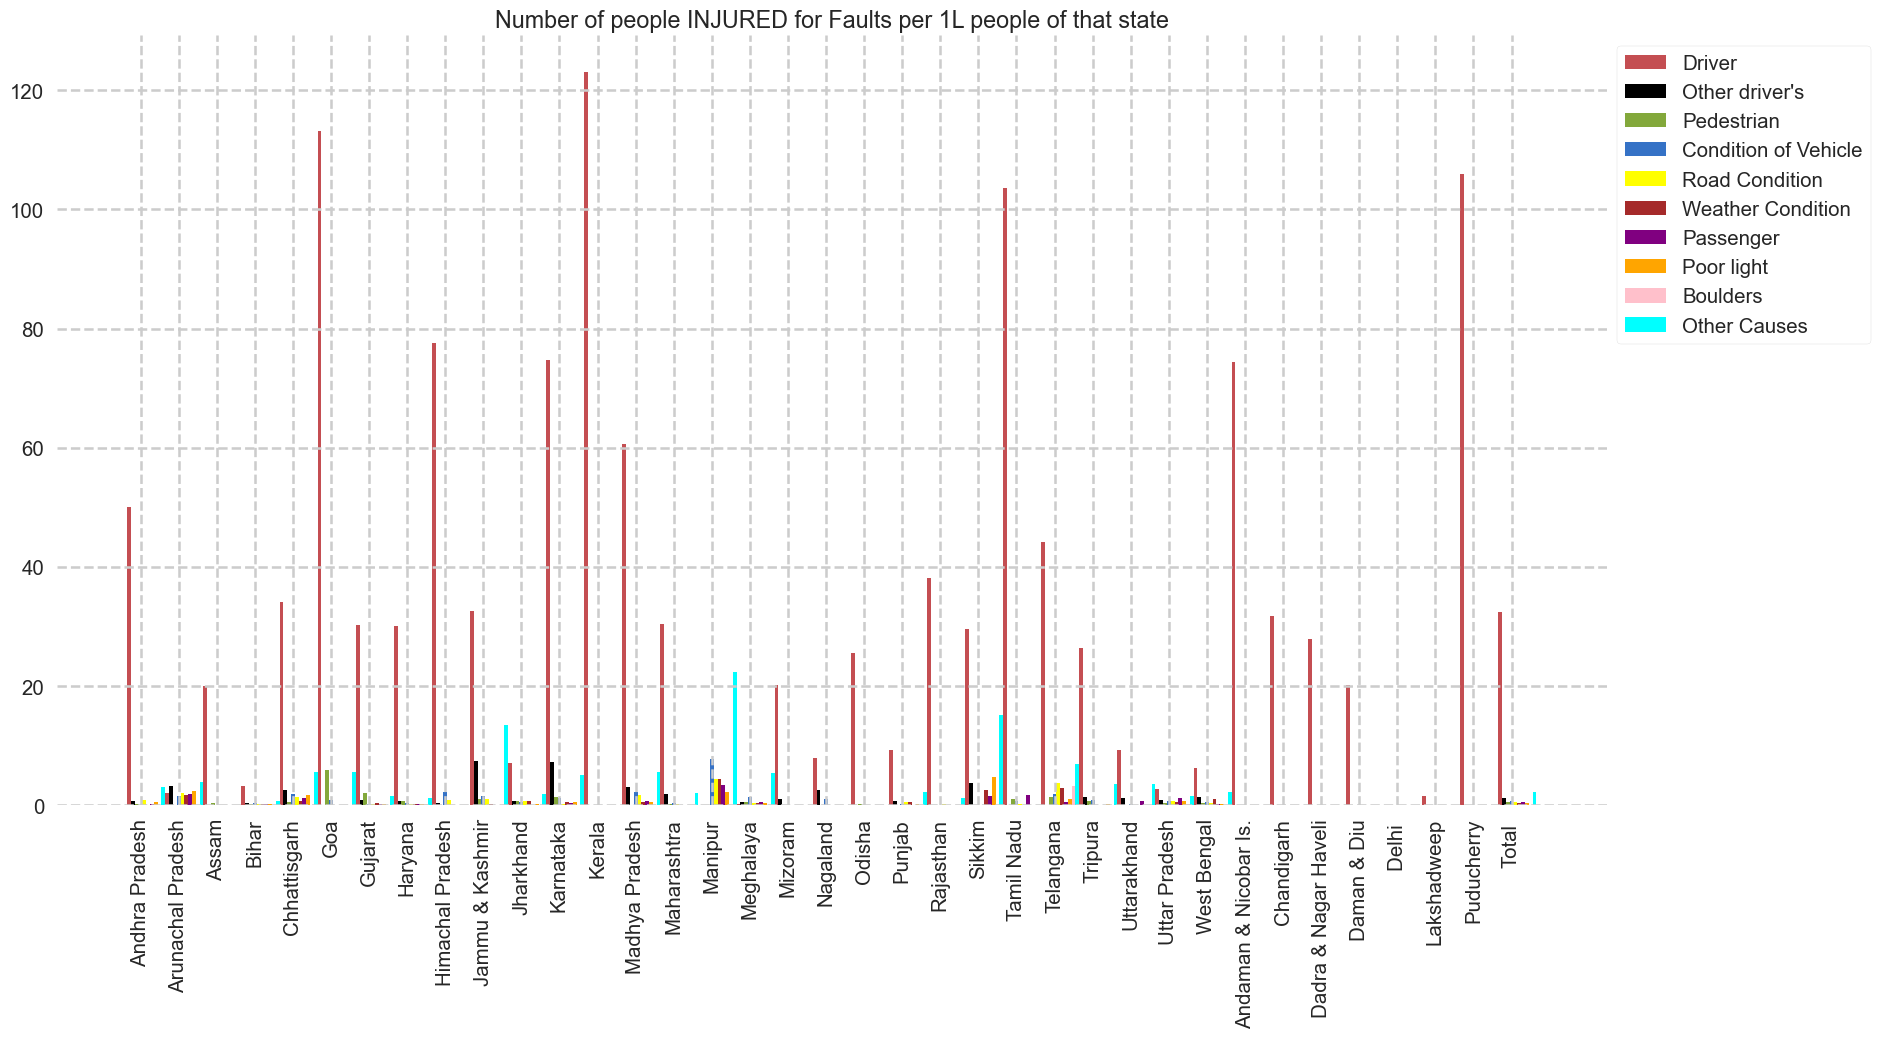

In [92]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.6, df5['Fault of Driver-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='r',align='center',label='Driver')
plt.bar(UT-0.4, df5['Fault of Driver of other vehicles-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='black',align='center',label='Other driver\'s')
plt.bar(UT-0.2, df5['Fault of Pedestrian-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='g',align='center',label='Pedestrian')
plt.bar(UT, df5['Defect in Condition of Motor Vehicle-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='b',align='center',label='Condition of Vehicle')
plt.bar(UT+0.2, df5['Defect in Road Condition-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='yellow',align='center',label='Road Condition')
plt.bar(UT+0.4, df5['Weather Condition-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='brown',align='center',label='Weather Condition')
plt.bar(UT+0.6, df5['Fault of Passenger-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='purple',align='center',label='Passenger')
plt.bar(UT+0.8, df5['Poor light-Number of Persons-Injured - 2014 per 1L people'], width=0.2, color='orange',align='center',label='Poor light')
plt.bar(UT+1.0, df5['Falling of boulders-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='pink',align='center',label='Boulders')
plt.bar(UT+1.2, df5['Other causes/causes not known-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='cyan',align='center',label='Other Causes')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title("Number of people INJURED for Faults per 1L people of that state")
plt.show()

In [84]:
df6 = pd.read_csv('typeOfVehicle.csv')

In [85]:
df6.head()

,Sl. No.,States/UTs,Two-Wheelers - Number of Road Accidents - Fatal - 2014,Two-Wheelers - Number of Road Accidents - Fatal - 2014 per 1L people,Two-Wheelers - Number of Road Accidents - Total - 2014,Two-Wheelers - Number of Road Accidents - Total - 2014 per 1L people,Two-Wheelers - Number of Persons - Killed - 2014,Two-Wheelers - Number of Persons - Killed - 2014 per 1L people,Two-Wheelers - Number of Persons - Injured - 2014,Two-Wheelers - Number of Persons - Injured - 2014 per 1L people,...,Other Motor Vehicles - Number of Persons - Injured - 2014 per 1L people,Other Vehicles/Objects - Number of Road Accidents - Fatal - 2014,Other Vehicles/Objects - Number of Road Accidents - Fatal - 2014 per 1L people,Other Vehicles/Objects - Number of Road Accidents - Total - 2014,Other Vehicles/Objects - Number of Road Accidents - Total - 2014 per 1L people,Other Vehicles/Objects - Number of Persons - Killed - 2014,Other Vehicles/Objects - Number of Persons - Killed - 2014 per 1L people,Other Vehicles/Objects - Number of Persons - Injured - 2014,Other Vehicles/Objects - Number of Persons - Injured - 2014 per 1L people,Population
0,1,Andhra Pradesh,1961,3.741606,7239,13.812077,2003,3.821742,7333,13.991430,...,2.520480,466,0.889132,1279,2.440344,884,1.686680,1289,2.459424,52410653
1,2,Arunachal Pradesh,15,1.084029,34,2.457132,21,1.517640,30,2.168058,...,0.000000,27,1.951252,55,3.974772,33,2.384863,58,4.191578,1383727
2,3,Assam,489,1.567028,1508,4.832470,537,1.720846,1342,4.300513,...,2.868077,73,0.233933,249,0.797934,93,0.298024,218,0.698593,31205576
3,4,Bihar,769,0.738717,1750,1.681085,820,0.787708,1131,1.086461,...,0.425555,614,0.589821,1577,1.514898,690,0.662828,1165,1.119122,104099452
4,5,Chhattisgarh,1074,4.204313,4787,18.739334,1126,4.407873,4295,16.813336,...,4.662324,142,0.555877,515,2.016034,154,0.602853,438,1.714608,25545198


In [86]:
row, column = df6.shape
round(((row - df6.isnull().sum())/row)*100)

Sl. No.                                                                                 100.0
States/UTs                                                                              100.0
Two-Wheelers - Number of Road Accidents - Fatal - 2014                                  100.0
Two-Wheelers - Number of Road Accidents - Fatal - 2014 per 1L people                    100.0
Two-Wheelers - Number of Road Accidents - Total - 2014                                  100.0
Two-Wheelers - Number of Road Accidents - Total - 2014 per 1L people                    100.0
Two-Wheelers - Number of Persons - Killed - 2014                                        100.0
Two-Wheelers - Number of Persons - Killed - 2014 per 1L people                          100.0
Two-Wheelers - Number of Persons - Injured - 2014                                       100.0
Two-Wheelers - Number of Persons - Injured - 2014 per 1L people                         100.0
Auto-Rickshaws - Number of Road Accidents - Fatal - 2014    

In [87]:
df6.dropna(axis = 0, how = 'any', inplace = True)

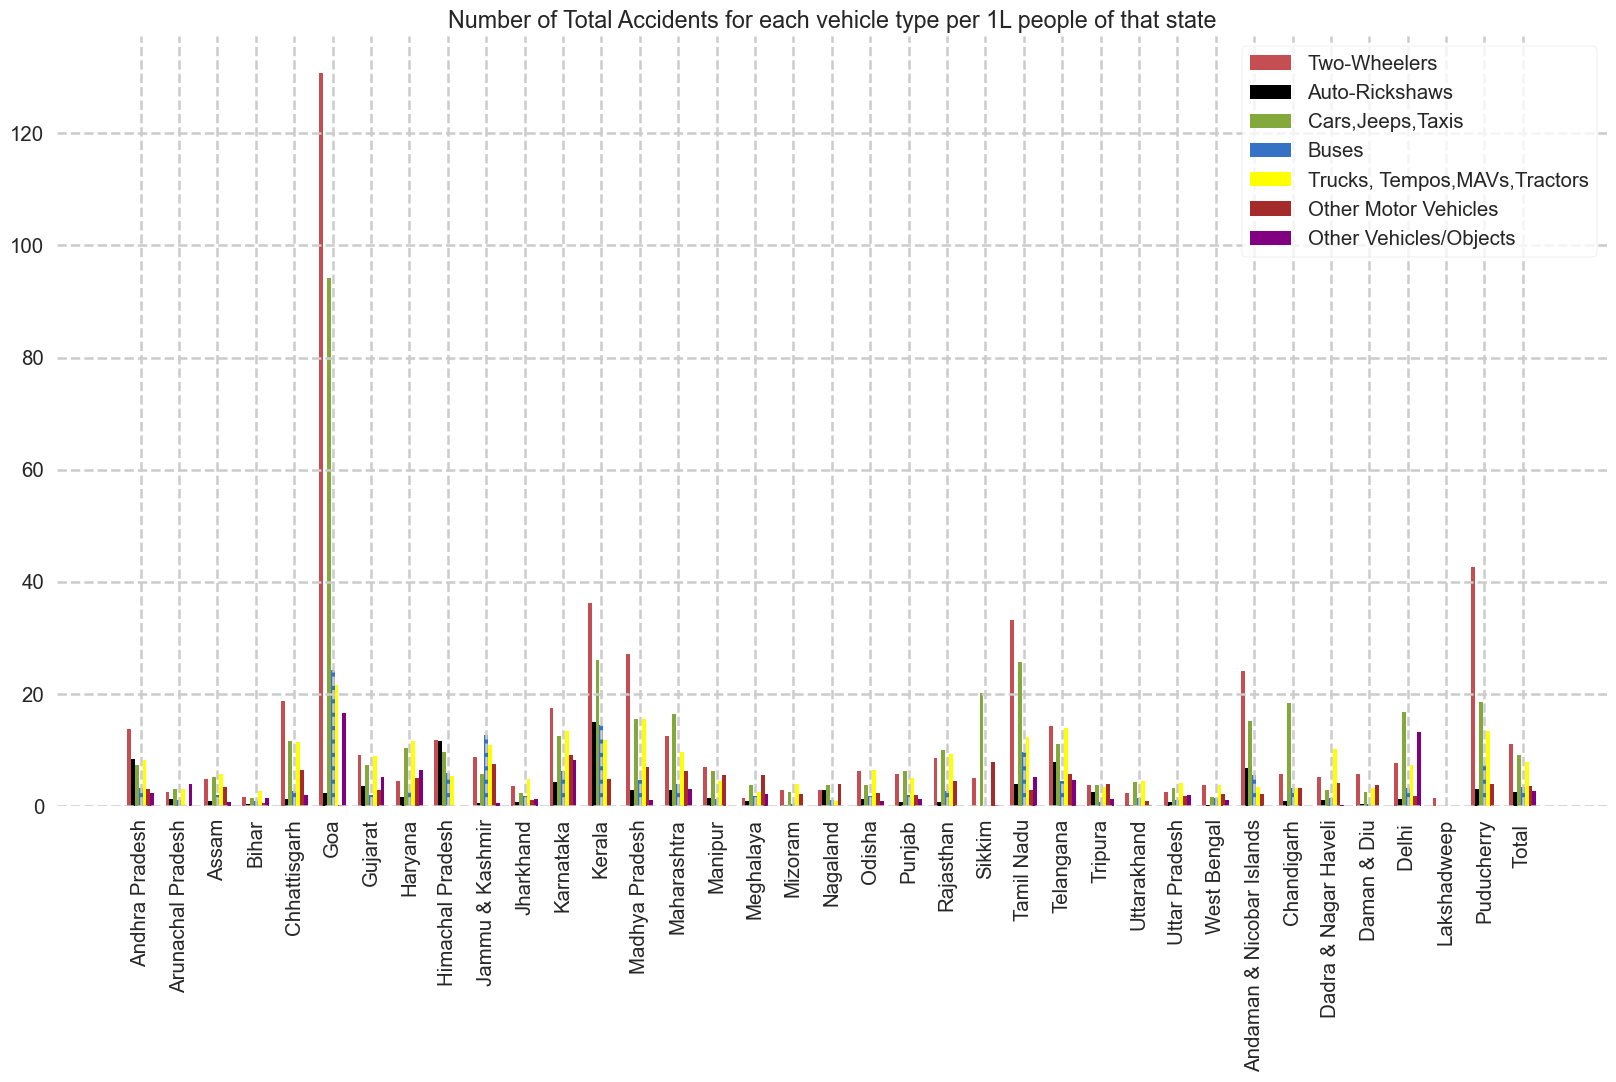

In [88]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})
UT=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37])
UT=UT*2

plt.bar(UT-0.6,df6['Two-Wheelers - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='r',align='center',label='Two-Wheelers')
plt.bar(UT-0.4,df6['Auto-Rickshaws - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='black',align='center',label='Auto-Rickshaws')
plt.bar(UT-0.2,df6['Cars, Jeeps,Taxis - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='g',align='center',label='Cars,Jeeps,Taxis')
plt.bar(UT,df6['Buses - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='b',align='center',label='Buses')
plt.bar(UT+0.2,df6['Trucks, Tempos,MAVs,Tractors - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Trucks, Tempos,MAVs,Tractors')
plt.bar(UT+0.4,df6['Other Motor Vehicles - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='brown',align='center',label='Other Motor Vehicles')
plt.bar(UT+0.6,df6['Other Vehicles/Objects - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='purple',align='center',label='Other Vehicles/Objects')

plt.xticks(UT,df6['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Number of Total Accidents for each vehicle type per 1L people of that state")
plt.show()

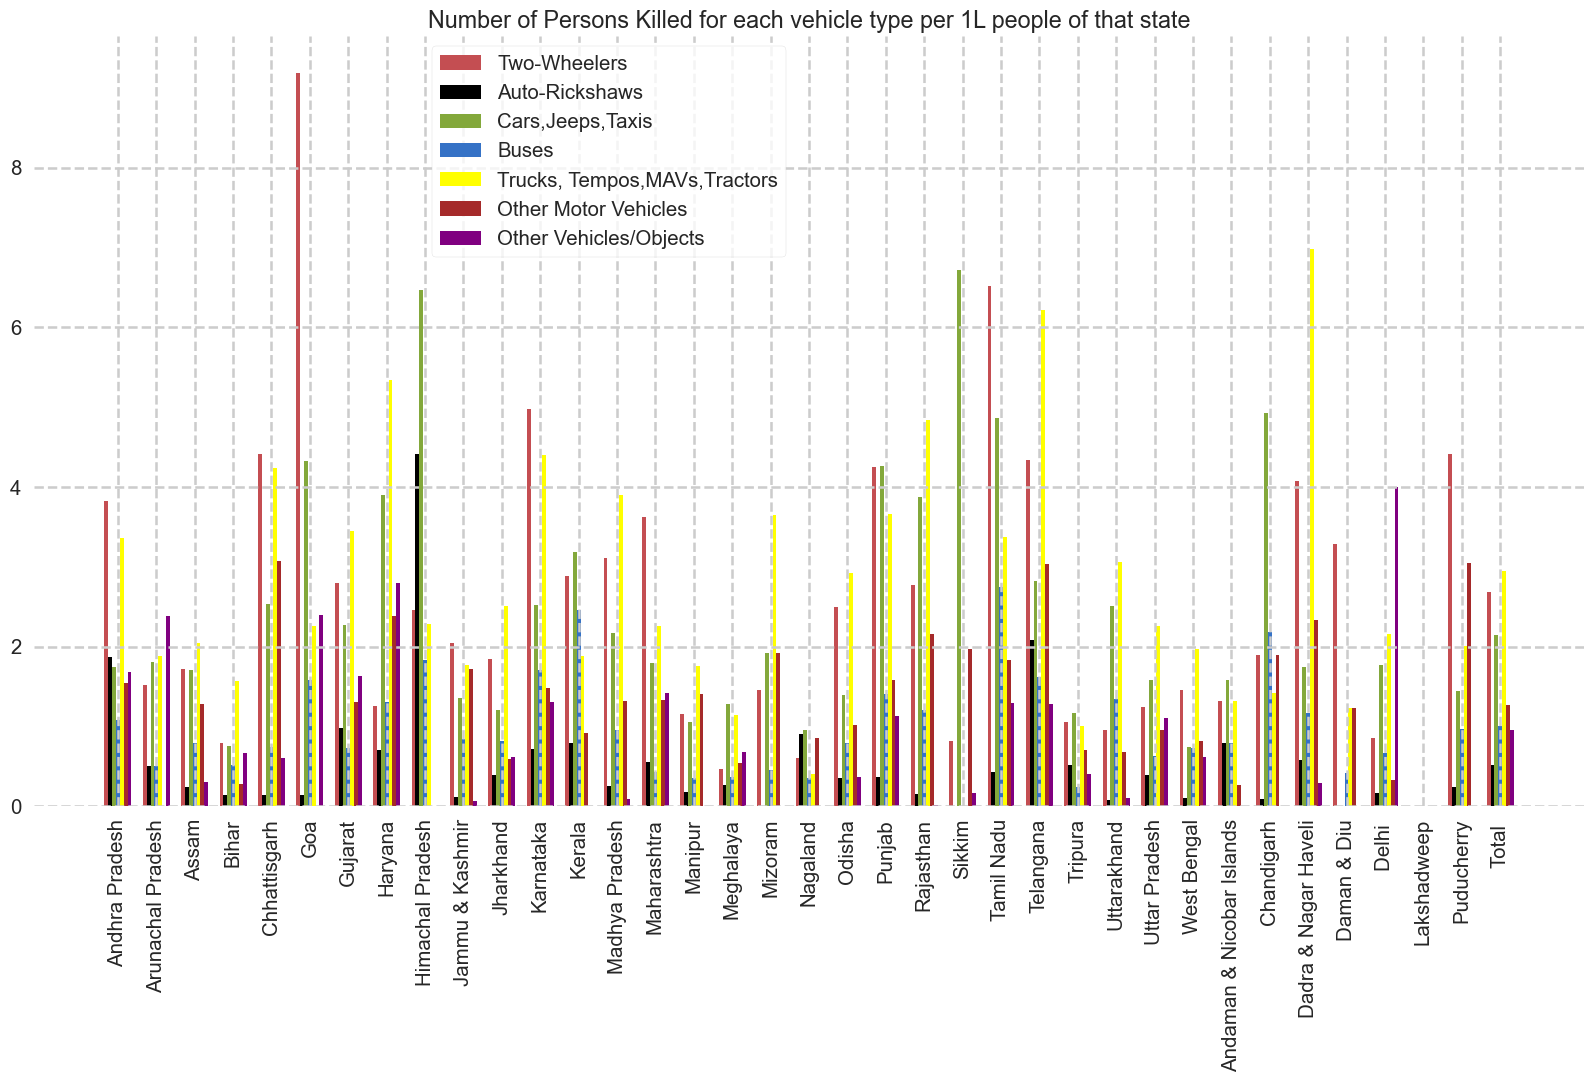

In [89]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.6,df6['Two-Wheelers - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='r',align='center',label='Two-Wheelers')
plt.bar(UT-0.4,df6['Auto-Rickshaws - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='black',align='center',label='Auto-Rickshaws')
plt.bar(UT-0.2,df6['Cars, Jeeps,Taxis - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='g',align='center',label='Cars,Jeeps,Taxis')
plt.bar(UT,df6['Buses - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='b',align='center',label='Buses')
plt.bar(UT+0.2,df6['Trucks, Tempos,MAVs,Tractors - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Trucks, Tempos,MAVs,Tractors')
plt.bar(UT+0.4,df6['Other Motor Vehicles - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='brown',align='center',label='Other Motor Vehicles')
plt.bar(UT+0.6,df6['Other Vehicles/Objects - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='purple',align='center',label='Other Vehicles/Objects')

plt.xticks(UT,df6['States/UTs'],rotation='vertical')
plt.legend(loc='upper left', bbox_to_anchor=(0.25,1))
plt.title("Number of Persons Killed for each vehicle type per 1L people of that state")
plt.show()

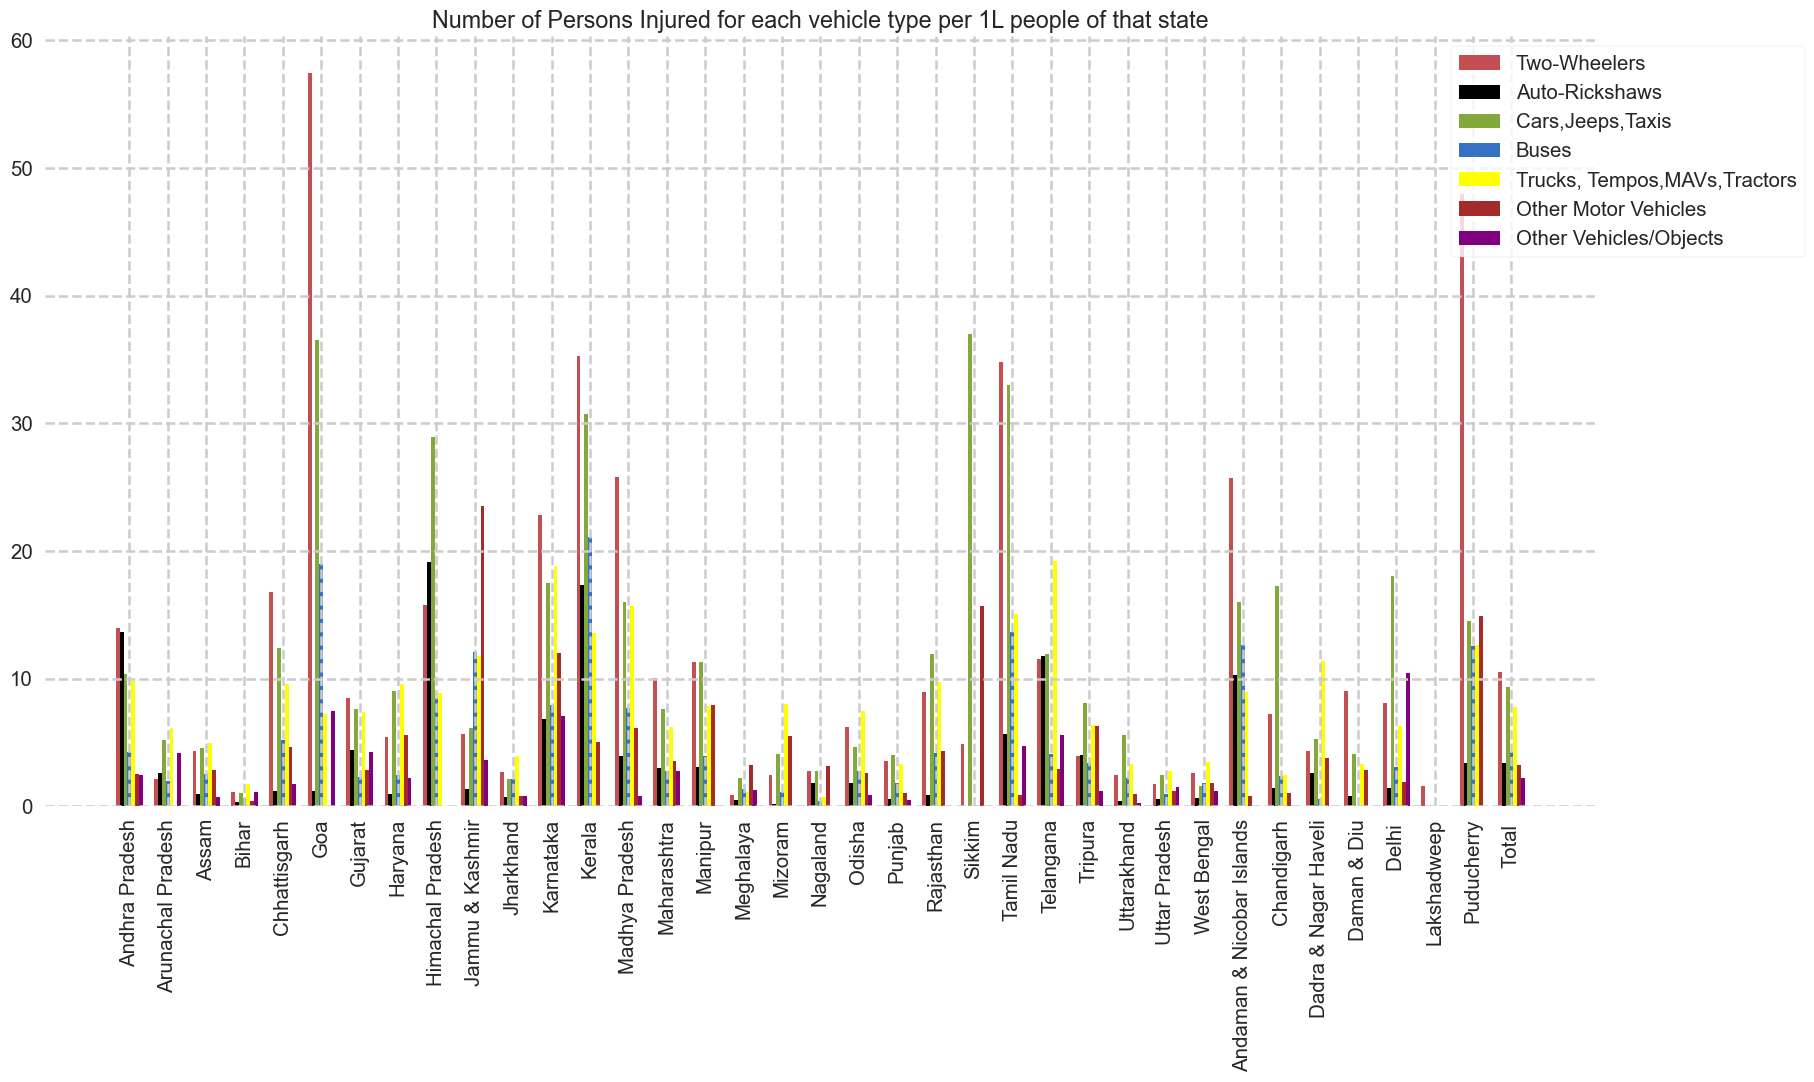

In [90]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':18})

plt.bar(UT-0.6,df6['Two-Wheelers - Number of Persons - Injured - 2014 per 1L people'],width=0.2,color='r',align='center',label='Two-Wheelers')
plt.bar(UT-0.4,df6['Auto-Rickshaws - Number of Persons - Injured - 2014 per 1L people'],width=0.2,color='black',align='center',label='Auto-Rickshaws')
plt.bar(UT-0.2,df6['Cars, Jeeps,Taxis - Number of Persons - Injured - 2014 per 1L people'],width=0.2,color='g',align='center',label='Cars,Jeeps,Taxis')
plt.bar(UT,df6['Buses - Number of Persons - Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Buses')
plt.bar(UT+0.2,df6['Trucks, Tempos,MAVs,Tractors - Number of Persons - Injured - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Trucks, Tempos,MAVs,Tractors')
plt.bar(UT+0.4,df6['Other Motor Vehicles - Number of Persons - Injured - 2014 per 1L people'],width=0.2,color='brown',align='center',label='Other Motor Vehicles')
plt.bar(UT+0.6,df6['Other Vehicles/Objects - Number of Persons - Injured - 2014 per 1L people'],width=0.2,color='purple',align='center',label='Other Vehicles/Objects')

plt.xticks(UT,df6['States/UTs'],rotation='vertical')
plt.legend(loc='upper left', bbox_to_anchor=(0.9,1))
plt.title("Number of Persons Injured for each vehicle type per 1L people of that state")
plt.show()

In [94]:
df7 = pd.read_excel('timeOfOccurence.xls')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [95]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   S. No.                       37 non-null     object
 1   States/Uts                   37 non-null     object
 2   06-900hrs - Day - 2014       37 non-null     int64 
 3   09-1200hrs - Day - 2014      37 non-null     int64 
 4   12-1500hrs - Day - 2014      37 non-null     int64 
 5   15-1800hrs - Day - 2014      37 non-null     int64 
 6   18-2100hrs - Night - 2014    37 non-null     int64 
 7   21-2400hrs - Night - 2014    37 non-null     int64 
 8   00-300hrs - Night - 2014     37 non-null     int64 
 9   03-600hrs - Night - 2014     37 non-null     int64 
 10  Total Accidents - 2014       37 non-null     int64 
 11  06-900hrs - (Day) - 2016     37 non-null     int64 
 12  09-1200hrs - (Day) - 2016    37 non-null     int64 
 13  12-1500hrs - (Day) - 2016    37 non-n

In [99]:
dayTime2014 = df7['03-600hrs - Night - 2014']+ df7['06-900hrs - Day - 2014'] + \
              df7['09-1200hrs - Day - 2014']+df7['12-1500hrs - Day - 2014']+df7['15-1800hrs - Day - 2014']
nightTime2014 = df7['00-300hrs - Night - 2014'] + df7['18-2100hrs - Night - 2014']+df7['21-2400hrs - Night - 2014']

In [100]:
dayTime2016 = df7['03-600hrs - (Night) - 2016']+ df7['06-900hrs - (Day) - 2016'] + \
              df7['09-1200hrs - (Day) - 2016']+df7['12-1500hrs - (Day) - 2016']+df7['15-1800hrs - (Day) - 2016']
nightTime2016 = df7['00-300hrs - (Night) - 2016'] + df7['18-2100hrs - (Night) - 2016']+df7['21-2400hrs - (Night) - 2016']

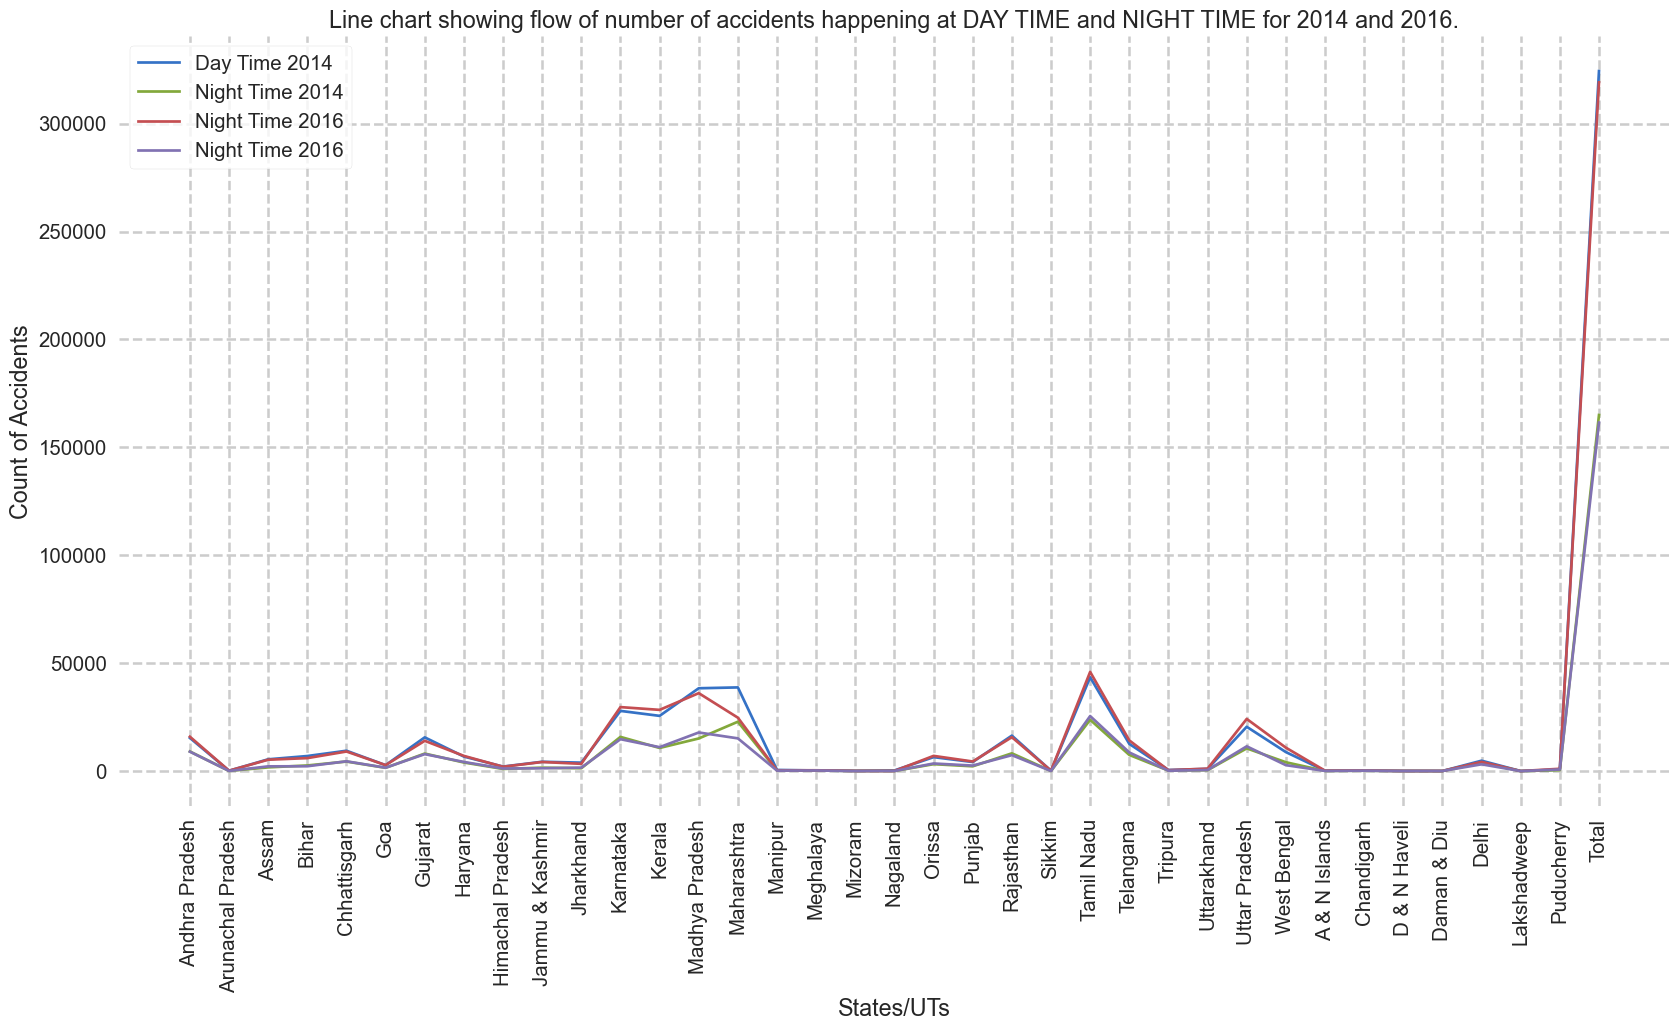

In [101]:
plt.rcParams.update({'font.size'  : 18})
plt.figure(figsize = (20,10))

plt.plot(df7['States/Uts'], dayTime2014, label = 'Day Time 2014')
plt.plot(nightTime2014, label = 'Night Time 2014')
plt.plot(dayTime2016, label = 'Night Time 2016')
plt.plot(nightTime2016, label = 'Night Time 2016')

plt.title("Line chart showing flow of number of accidents happening at DAY TIME and NIGHT TIME for 2014 and 2016.")
plt.xlabel("States/UTs")
plt.ylabel("Count of Accidents")
plt.xticks(rotation = 90)
plt.legend( loc = 'best')
plt.show()